<a href="https://colab.research.google.com/github/numustafa/Object-Detection/blob/main/RTMDet/mmdet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train RTMDet on Custom Dataset
MMdetection is one of the most populat computer Vision Libraries out there, with focus on object detection. It is a part of openMMlab project, consists of around 30 Libraries covering topics from detection, segmentation, etc, and is designed in a way, that is easy for academia and industry alike for object detection research and application. MMdetection specializes in providing efficient, flexible, and modular implementations of state-of-the-art object detection algorithm.

This project uses Jupyter notebook for the code and output executions, and follow the outline:
1. Installing MMdetection in Python enviroment
2. Run the inference with pre-trained COCO Model
3. Train the model on custom dataset
4. Benchmark the model

MMdetectin is the largest lib in OpenMMLab ecosystem, and allows to train and deploy dozems of popular models, such as DetR, YOLOx, RTMdet, etc.

#### Q. Why using RTMDet?
RTMDet speed and accuracy compared to other state of the art real-time object detectors, however, as part of mmdetection it is distributed undet APACHE 2.0 liscence, which makes it lucirative for people to use it for enterprise of closed source project.


## RTMDet with MMDetection and MMYOLO

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/open-mmlab/mmdetection)
[![arXiv](https://img.shields.io/badge/arXiv-2212.07784-b31b1b.svg)](https://arxiv.org/pdf/2212.07784.pdf)

![Models Comparison](https://user-images.githubusercontent.com/12907710/208070055-7233a3d8-955f-486a-82da-b714b3c3bbd6.png)

***Figure 1.*** *RTMDet vs. other real-time object detectors.*

![Model Structure](https://user-images.githubusercontent.com/27466624/204126145-cb4ff4f1-fb16-455e-96b5-17620081023a.jpg)

***Figure 2.*** *RTMDet-l model structure.*



## 1. Installing MMdetection in Python enviroment

* Check GPU
By using `!nvidia-smi` command, we know if our system has access to GPU.

In [1]:
!nvidia-smi


Tue Apr 16 10:51:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Making home constant
import os
HOME = os.getcwd()
print("HOME: ", HOME)

HOME:  /content


In [3]:
!gcc --version

gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [4]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


* Package Installation
We will install Pytorch along with it, 4 libraries from OpenMMLab ecosystem.
1. MMCV
2. MMdetecction
3. MMEngine
4. MMDet

[Installation guide](https://mmdetection.readthedocs.io/en/latest/get_started.html) for [MMEngine](https://github.com/open-mmlab/mmengine), [MMCV](https://github.com/open-mmlab/mmcv) & [MIM](https://github.com/open-mmlab/mim).

It is important to note that mmcv might poses some errors due to version inconsistency. This can be resolve with the adjustment of Pytorch (and if necessary cuda version) as stated in the mmcv documentation.

In [5]:
%cd {HOME}

# Install OpemMMLab from pip
%pip install -U openmim

# Install prev version for Pytorch
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 torchdata==0.6.1 torchtext==0.15.2 fastapi kaleido python-multipart uvicorn lida torchdata yfinance

# install further packages from opemMM
!mim install -q "mmengine>=0.7.0"
!pip install mmcv==2.1.0 -f https://download.openmmlab.com/mmcv/dist/cu121/torch2.1/index.html
!mim install -q "mmdet>=3.0.0rc6,<3.1.0"

!git clone https://github.com/open-mmlab/mmdetection.git

%cd {HOME}/mmdetection

%pip install -e .

/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 101.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 98.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 111.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 100.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 103.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

* Install additional Packages for ease of use.

These packages are not necessary to work with OpenMMLab

1. [roboflow: ](https://pypi.org/project/roboflow/) Allows to download opensource datasets from Roboflow universe
2. [supervision: ](https://github.com/roboflow/supervision) provides Computer Vision utilities, which helps to filter, annotate detections, process datasets, and benchmark the model.

In [6]:
!pip install -q roboflow
!pip install -q supervision==0.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 2.3 MB/s eta 0:00:00


In [7]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet


def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
CUDA available: True
MUSA available: False
numpy_random_seed: 2147483648
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 12.2, V12.2.140
GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
PyTorch: 2.0.1+cu117
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch

RTMdet model comes in different sizes, tiny to extra-large. For this specific tutorial, I will be using RTMDet-tiny, (as mentioned in [Tutorial](https://github.com/open-mmlab/mmdetection/blob/main/demo/MMDet_Tutorial.ipynb)) and to do this we need to download the checkpoints file.

However, the config file is already there in the mmdetection folder, a repository we downloaded earlier.

In [8]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir ./checkpoints
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints

processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 10.8 MB/s eta 0:00:00
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /content/mmdetection/checkpoints
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /content/mmdetection/checkpoints


#### Download Example Data

An image includes a person, dog, car and a backpack in an image. The example image is similar to images in COCO dataset, which shouldnt be a problem for a model to detect the object in an image.

First we load the image and run the inference, runt the inference & examine the results.

In [9]:
!mkdir ./data
!wget -P ./data -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!ls -lh ./data

total 104K
-rw-r--r-- 1 root root 104K Jun  2  2023 dog.jpeg


## Inference the detector
Since the model is successfully created & loaded, lets see how good it is. We use high-level API `DetInferencer` implemented in the MMDetection. This API is created to ease the inference process. This can be found [here](https://github.com/open-mmlab/mmdetection/blob/dev-3.x/mmdet/apis/det_inferencer.py)


In [10]:
from mmdet.apis import DetInferencer

# choose to use a config
model_name = 'rtmdet_tiny_8xb32-300e_coco'
# setup checkpointfile to load
checkpoint = './checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

# set the device to be used
device = 'cuda:0'

# Initialize the Detinferencer
inferencer = DetInferencer(model_name, checkpoint, device)

# use the detector to do Inference
img = './data/dog.jpeg'
result = inferencer(img, out_dir='./output')

Loads checkpoint by local backend from path: ./checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

04/16 10:55:26 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


Output()

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming 
release, it will be required to pass the indexing argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:760: UserWarning: Warning: The bbox is
out of bounds, the drawn bbox may not be in the image
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:831: UserWarning: Warning: The polygon
is out of bounds, the drawn polygon may not be in the image
  warnings.warn(

In [11]:
# Show the structure of result dict
from rich.pretty import pprint
pprint(result, max_length=4)

{
│   'predictions': [
│   │   {
│   │   │   'labels': [16, 24, 0, 24, ... +296],
│   │   │   'scores': [0.4949643313884735, 0.4848298132419586, 0.4496346116065979, 0.4111327528953552, ... +296],
│   │   │   'bboxes': [
│   │   │   │   [49.5562744140625, 248.32150268554688, 648.59716796875, 1278.269287109375],
│   │   │   │   [0.6627197265625, 306.57110595703125, 648.0780029296875, 1280.0],
│   │   │   │   [0.9105377197265625, 319.5498046875, 632.296142578125, 1279.6531982421875],
│   │   │   │   [1.021514892578125, 666.7115478515625, 444.426513671875, 1279.9161376953125],
│   │   │   │   ... +296
│   │   │   ]
│   │   }
│   ],
│   'visualization': [
│   │   array([[[119, 156, 201],
│   │   [119, 156, 201],
│   │   [119, 156, 201],
│   │   ...,
│   │   [131, 163, 201],
│   │   [130, 162, 200],
│   │   [130, 162, 200]],
│      
│      [[119, 156, 201],
│   │   [119, 156, 201],
│   │   [119, 156, 201],
│   │   ...,
│   │   [132, 164, 202],
│   │   [131, 163, 201],
│   │   [130, 162, 200]],
│      
│      [[118, 155, 200],
│   │   [118, 155, 200],
│   │   [118, 155, 200],
│   │   ...,
│   │   [132, 164, 202],
│   │   [131, 163, 201],
│   │   [130, 162, 200]],
│      
│      ...,
│      
│      [[225,  46,  90],
│   │   [225,  46,  90],
│   │   [243, 127, 181],
│   │   ...,
│   │   [ 82,  64,  52],
│   │   [122, 100,  87],
│   │   [150, 124, 109]],
│      
│      [[225,  46,  90],
│   │   [225,  46,  90],
│   │   [238, 108, 160],
│   │   ...,
│   │   [104,  84,  73],
│   │   [137, 115, 102],
│   │   [147, 121, 106]],
│      
│      [[225,  46,  90],
│   │   [225,  46,  90],
│   │   [225,  46,  90],
│   │   ...,
│   │   [118,  98,  87],
│   │   [143, 121, 108],
│   │   [144, 118, 103]]], dtype=uint8)
│   ]
}

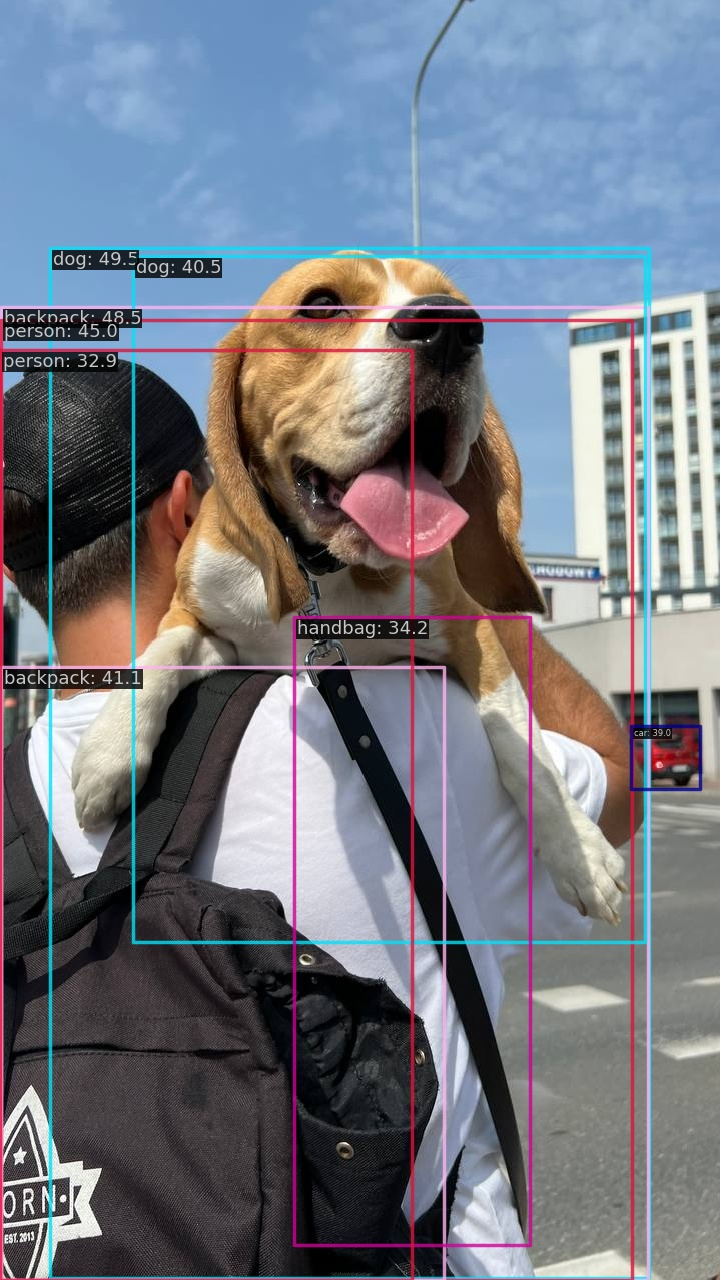

In [12]:
# Show the output image
from PIL import Image
Image.open('./output/vis/dog.jpeg')

It appears alot of bounding boxes, which indicates mmdetection returning results without any post-processing.



## Train on Custom Dataset
To train custom model, the data needs to be in COCO format, in principal MMDetection expect the data in COC format. However, it require categories and image ids starts with 1 instead of 0.

The dataset from Roboflow (with additional export format) is compatible with the MMDetection, like COCO. The [dataset](https://universe.roboflow.com/pip-tracker/double-twelve-dominoes) consists of images of dominos.

1. Make a new directory to download the dataset
2. Download the dataset
3. Configure the config file

In [13]:
!mkdir ./new_data
%cd new_data

/content/mmdetection/new_data


In [14]:
import roboflow
# Download the dataset (COCO MMDetection format + generate the tocken from roboflow)
roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("pip-tracker").project("double-twelve-dominoes")
version = project.version(2)
dataset = version.download("coco-mmdetection")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Double-twelve-dominoes-2 in coco-mmdetection:: 100%|██████████| 358/358 [00:00<00:00, 5242.92it/s]


### Inference with pre-trained RTMdet COCO Model

In [17]:
%pwd

'/content/mmdetection/new_data'

In [30]:
CUSTOM_CONFIG_PATH = f"{HOME}/mmdetection/configs/rtmdet/rtmdet_tiny_1xb4-20e_roboflow.py"
config_roboflow = f"""
# Inherit and overwrite part of the config based on this config
_base_ = './rtmdet_tiny_8xb32-300e_coco.py'

class_name = {tuple(sorted(project.classes.keys()))}
num_classes = {len(project.classes)}


data_root = '{dataset.location}/' # dataset root
dataset_type = 'CocoDataset'

train_ann_file = 'train/_annotations.coco.json'
train_data_prefix = 'train/'

val_ann_file = 'valid/_annotations.coco.json'
val_data_prefix = 'valid/'

train_batch_size_per_gpu = 8
# Worker to pre-fetch data for each single GPU during training
train_num_workers = 4
# persistent_workers must be False if num_workers is 0.
persistent_workers = True

# Batch size of a single GPU during validation
val_batch_size_per_gpu = 32
# Worker to pre-fetch data for each single GPU during validation
val_num_workers = 10

# -----train val related-----
max_epochs = 50
stage2_num_epochs = 20
# Change train_pipeline for final 20 epochs (stage 2)
base_lr = 0.00008

model_test_cfg = dict(
    # The config of multi-label for multi-class prediction.
    multi_label=True,
    # The number of boxes before NMS
    nms_pre=30000,
    score_thr=0.001,  # Threshold to filter out boxes.
    nms=dict(type='nms', iou_threshold=0.65),  # NMS type and threshold
    max_per_img=300)  # Max number of detections of each image


metainfo = dict(classes=class_name, palette=[(20, 220, 60)])

train_dataloader = dict(
    batch_size=train_batch_size_per_gpu,
    num_workers=train_num_workers,
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        data_prefix=dict(img=train_data_prefix),
        ann_file=train_ann_file))

val_dataloader = dict(
    batch_size=val_batch_size_per_gpu,
    num_workers=val_num_workers,
    dataset=dict(
      data_root=data_root,
      metainfo=metainfo,
      data_prefix=dict(img=val_data_prefix),
      ann_file=val_ann_file))

test_dataloader = val_dataloader

val_evaluator = dict(
    type='mmdet.CocoMetric',
    proposal_nums=(100, 1, 10),
    ann_file=data_root + val_ann_file,
    metric='bbox')

test_evaluator = val_evaluator

model = dict(bbox_head=dict(num_classes=num_classes))

# learning rate
param_scheduler = [
    dict(
        type='LinearLR',
        start_factor=1.0e-5,
        by_epoch=False,
        begin=0,
        end=1000),
    dict(
        # use cosine lr from 10 to 20 epoch
        type='CosineAnnealingLR',
        eta_min=base_lr * 0.05,
        begin=max_epochs // 2,
        end=max_epochs,
        T_max=max_epochs // 2,
        by_epoch=True,
        convert_to_iter_based=True),
]

train_pipeline_stage2 = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='RandomResize',
        scale=(640, 640),
        ratio_range=(0.1, 2.0),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(640, 640)),
    dict(type='YOLOXHSVRandomAug'),
    dict(type='RandomFlip', prob=0.5),
    dict(type='Pad', size=(640, 640), pad_val=dict(img=(114, 114, 114))),
    dict(type='PackDetInputs')
]

# optimizer
optim_wrapper = dict(
    _delete_=True,
    type='OptimWrapper',
    optimizer=dict(type='AdamW', lr=base_lr, weight_decay=0.05),
    paramwise_cfg=dict(
        norm_decay_mult=0, bias_decay_mult=0, bypass_duplicate=True))

default_hooks = dict(
    checkpoint=dict(
        interval=10,
        max_keep_ckpts=3,  # only keep latest 3 checkpoints
        save_best='auto'
    ),
    logger=dict(type='LoggerHook', interval=5))

custom_hooks = [
    dict(
        type='PipelineSwitchHook',
        switch_epoch=max_epochs - stage2_num_epochs,
        switch_pipeline=train_pipeline_stage2)
]

# load COCO pre-trained weight
load_from = '/content/mmdetection/checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

train_cfg = dict(type='EpochBasedTrainLoop', max_epochs=max_epochs, val_interval=10)
visualizer = dict(vis_backends=[dict(type='LocalVisBackend'),dict(type='TensorboardVisBackend')])
"""

with open(CUSTOM_CONFIG_PATH, 'w') as f:
    f.write(config_roboflow)

In [31]:
!python /content/mmdetection/tools/train.py /content/mmdetection/configs/rtmdet/rtmdet_tiny_1xb4-20e_roboflow.py

04/16 11:24:38 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 772662562
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.1+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_

## Test the Trained Detector
Visualizing the prediction results.

In [35]:
from mmdet.apis import DetInferencer
import glob

# Choose to use a config
config = './mmdetection/configs/rtmdet/rtmdet_tiny_1xb4-20e_roboflow.py'
# Setup a checkpoint file to load
checkpoint = glob.glob('/content/mmdetection/new_data/work_dirs/rtmdet_tiny_1xb4-20e_roboflow/best_coco_bbox_mAP_epoch_50.pth')[0]

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(config, checkpoint, device)

# Use the detector to do inference
img = '/content/mmdetection/new_data/Double-twelve-dominoes-2/valid/7db4369f-9991-4d5c-a461-74834a8f7181_jpg.rf.4e6a3779305c82e981b0037c53bd74c7.jpg'
result = inferencer(img, out_dir='./output')

ValueError: Cannot find model: ./mmdetection/configs/rtmdet/rtmdet_tiny_1xb4-20e_roboflow.py in mmdet